# **Clasificación de la cobertura terrestre de la UE**

En el marco de nuestro proyecto de análisis de datos, es fundamental mantener un registro claro y conciso de los avances realizados. Este informe proporciona una visión general de las etapas iniciales de nuestro trabajo, destacando los hitos más relevantes y los desafíos encontrados hasta el momento.


## **OEMC Hackathon: EU Land Cover Classification, Follow this link:**

https://www.kaggle.com/competitions/oemc-hackathon-eu-land-cover-classification/data, register for the task and download the data.

In particular, understand:

The machine learning task they define (what they want to predict)
How the data is provided
The structure and relation between the files train.csv, weather_train.csv and building_metadata.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


utilizamos la biblioteca Pandas para cargar y manipular datos de un archivo CSV ubicado en una ruta específica en Google Drive.

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Entrega2/kaggle'

In [3]:
!pip install kaggle

In [4]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Entrega2/kaggle'

cambiar el directorio de trabajo actual a la ruta especificada

In [5]:
%cd /content/drive/MyDrive/Entrega2/kaggle

/content/drive/MyDrive/Entrega2/kaggle


!ls mostrará los contenidos del directorio actual.

In [6]:
!ls

kaggle.json  land_cover


descargar los datos de una competición específica llamada "oemc-hackathon-eu-land-cover-classification"

In [7]:
!kaggle competitions download -c oemc-hackathon-eu-land-cover-classification

 92% 65.0M/70.8M [00:01<00:00, 57.6MB/s]
100% 70.8M/70.8M [00:01<00:00, 56.0MB/s]


para crear un directorio llamado "land_cover" y luego mover un archivo llamado "oemc-hackathon-eu-land-cover-classification.zip"

In [8]:
!mkdir land_cover
!mv oemc-hackathon-eu-land-cover-classification.zip land_cover

mkdir: cannot create directory ‘land_cover’: File exists


In [9]:
%cd land_cover/

/content/drive/MyDrive/Entrega2/kaggle/land_cover


**descomprimir (extraer) el contenido del archivo ZIP llamado "oemc-hackathon-eu-land-cover-classification.zip"**

In [10]:
!unzip oemc-hackathon-eu-land-cover-classification.zip

Archive:  oemc-hackathon-eu-land-cover-classification.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Leer el archivo train.csv y muestra las primeras 10 filas**



In [11]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv("train.csv")
train.head(10)

,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0,16,Grassland without tree/shrub cover,2006,3630.0,13868.0,13877.0,13887.0,13897.0,2700.0,...,3080.0,5516.0,566.0,673.0,1418.0,537.0,0.0,141.0,7.0,151.0
1,1,10,Coniferous woodland,2006,2851.0,13810.0,13815.0,13820.0,13827.0,2565.0,...,2560.0,3292.0,143.0,156.0,478.0,348.0,0.0,614.0,55.0,683.0
2,2,15,Grassland with sparse tree/shrub cover,2018,3973.0,13958.0,13961.0,13963.0,13964.0,2650.0,...,4180.0,6372.0,254.0,286.0,1225.0,891.0,0.0,606.0,13.0,336.0
3,3,16,Grassland without tree/shrub cover,2006,4401.0,13793.0,13796.0,13800.0,13805.0,3076.0,...,5020.0,7024.0,510.0,569.0,1429.0,796.0,22.0,820.0,8.0,688.0
4,4,58,Shrubland with sparse tree cover,2012,4330.0,13868.0,13868.0,13867.0,13866.0,2875.0,...,3180.0,6148.0,582.0,863.0,1964.0,850.0,74.0,191.0,19.0,221.0
5,5,12,Dry pulses,2018,3124.0,14110.0,14106.0,14102.0,14099.0,2794.0,...,1743.0,2642.0,952.0,1428.0,684.0,576.0,0.0,672.0,17.0,551.0
6,6,16,Grassland without tree/shrub cover,2015,5640.0,14111.0,14109.0,14108.0,14106.0,5493.0,...,5032.0,6496.0,340.0,437.0,499.0,554.0,0.0,56.0,61.0,210.0
7,7,16,Grassland without tree/shrub cover,2018,5006.0,14010.0,14011.0,14012.0,14012.0,5016.0,...,4788.0,6364.0,535.0,481.0,1391.0,695.0,0.0,718.0,2.0,206.0
8,8,51,Pine dominated mixed woodland,2018,3845.0,14002.0,14002.0,14002.0,14001.0,2514.0,...,3382.0,5788.0,361.0,284.0,1457.0,579.0,0.0,915.0,31.0,315.0
9,9,15,Grassland with sparse tree/shrub cover,2012,3889.0,14054.0,14053.0,14051.0,14049.0,3669.0,...,3324.0,5032.0,516.0,759.0,707.0,591.0,0.0,217.0,49.0,277.0


leer el archivo train.csv

Verificacion del Tamaño real  de la base  datos

In [12]:
## KEEPOUTPUT
print (train.shape)
print (test.shape)

(42237, 420)
(42271, 418)


Valores faltantes en columnas

In [13]:
## KEEPOUTPUT
k = train.isna().sum()
k[k!=0]

Series([], dtype: int64)

Eliminar datos de forma aleatoria

In [14]:
#import pandas as pd
#import numpy as np  # Importa NumPy para generar valores aleatorios

# Supongamos que 'train' es tu DataFrame cargado previamente

# Define la fracción de celdas que deseas eliminar (por ejemplo, 10%)
fraccion_a_eliminar = 0.1

# Calcula el número total de celdas en el DataFrame
total_celdas = train.size

# Calcula la cantidad de celdas a eliminar
celdas_a_eliminar = int(total_celdas * fraccion_a_eliminar)

# Genera una lista de índices aleatorios para seleccionar celdas al azar
indices_aleatorios = np.random.choice(train.index, size=celdas_a_eliminar, replace=True)

# Itera sobre los índices aleatorios y establece el valor en esas celdas como NaN (o cualquier otro valor que elijas)
for indice in indices_aleatorios:
    columna = np.random.choice(train.columns)  # Elije una columna aleatoriamente
    train.at[indice, columna] = np.nan  # Establece el valor como NaN

# Ahora, algunas celdas aleatorias en 'train' contienen valores NaN
train.head(10)

,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0.0,16.0,Grassland without tree/shrub cover,2006.0,3630.0,13868.0,13877.0,NaN,13897.0,2700.0,...,3080.0,NaN,566.0,673.0,1418.0,537.0,0.0,141.0,7.0,NaN
1,1.0,10.0,Coniferous woodland,NaN,2851.0,13810.0,13815.0,13820.0,13827.0,2565.0,...,2560.0,3292.0,143.0,156.0,478.0,348.0,0.0,NaN,55.0,683.0
2,2.0,15.0,Grassland with sparse tree/shrub cover,2018.0,3973.0,13958.0,13961.0,13963.0,13964.0,2650.0,...,4180.0,6372.0,254.0,286.0,NaN,891.0,0.0,NaN,13.0,336.0
3,3.0,16.0,Grassland without tree/shrub cover,2006.0,4401.0,13793.0,13796.0,13800.0,13805.0,3076.0,...,5020.0,7024.0,510.0,569.0,1429.0,796.0,22.0,820.0,8.0,688.0
4,4.0,NaN,Shrubland with sparse tree cover,2012.0,4330.0,13868.0,13868.0,13867.0,NaN,2875.0,...,3180.0,6148.0,582.0,863.0,1964.0,850.0,74.0,191.0,19.0,221.0
5,5.0,12.0,NaN,NaN,3124.0,14110.0,14106.0,14102.0,14099.0,2794.0,...,1743.0,2642.0,952.0,1428.0,684.0,576.0,0.0,672.0,17.0,551.0
6,NaN,16.0,Grassland without tree/shrub cover,2015.0,5640.0,14111.0,14109.0,14108.0,14106.0,5493.0,...,5032.0,6496.0,340.0,437.0,499.0,554.0,0.0,56.0,61.0,210.0
7,7.0,16.0,Grassland without tree/shrub cover,2018.0,5006.0,14010.0,14011.0,14012.0,14012.0,5016.0,...,4788.0,NaN,535.0,481.0,1391.0,695.0,0.0,718.0,2.0,206.0
8,8.0,51.0,Pine dominated mixed woodland,2018.0,3845.0,14002.0,14002.0,14002.0,14001.0,2514.0,...,3382.0,5788.0,361.0,284.0,1457.0,579.0,0.0,915.0,31.0,315.0
9,9.0,NaN,Grassland with sparse tree/shrub cover,2012.0,3889.0,14054.0,14053.0,14051.0,14049.0,3669.0,...,3324.0,5032.0,NaN,759.0,707.0,591.0,0.0,217.0,49.0,277.0




1.   explorar columnas con datos NAN


In [15]:
## KEEPOUTPUT
k = train.isna().sum()
k[k!=0]

sample_id                                               3978
land_cover                                              4049
land_cover_label                                        3981
year                                                    3936
evi_mod13q1.stl.trend_p90_250m_jan01_feb28              4010
                                                        ... 
nir_mod13q1_sd_250m_2000_2022                           4015
pop.count_ghs.jrc_m_100m                                3964
cost.distance.to.coast_gedi.grass.gis_30m_2000..2018    3987
slope.percent_gedi.eml_m_30m_2000_2018                  3994
elev.lowestmode_gedi.eml_m_30m_2000_2018                3994
Length: 420, dtype: int64

para rellenar datos faltantes

In [16]:
# Rellenar los valores NaN con la media de cada columna
# Fill NaNs for numerical columns with the mean or median
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numerical_cols] = train[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Fill NaNs for categorical columns with the mode
categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols] = train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
train.head(10)

,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0.0,16.0,Grassland without tree/shrub cover,2006.0,3630.0,13868.0,13877.0,13970.0,13897.0,2700.0,...,3080.0,5420.0,566.0,673.0,1418.0,537.0,0.0,141.0,7.0,288.0
1,1.0,10.0,Coniferous woodland,2012.0,2851.0,13810.0,13815.0,13820.0,13827.0,2565.0,...,2560.0,3292.0,143.0,156.0,478.0,348.0,0.0,272.0,55.0,683.0
2,2.0,15.0,Grassland with sparse tree/shrub cover,2018.0,3973.0,13958.0,13961.0,13963.0,13964.0,2650.0,...,4180.0,6372.0,254.0,286.0,1110.0,891.0,0.0,272.0,13.0,336.0
3,3.0,16.0,Grassland without tree/shrub cover,2006.0,4401.0,13793.0,13796.0,13800.0,13805.0,3076.0,...,5020.0,7024.0,510.0,569.0,1429.0,796.0,22.0,820.0,8.0,688.0
4,4.0,16.0,Shrubland with sparse tree cover,2012.0,4330.0,13868.0,13868.0,13867.0,13972.0,2875.0,...,3180.0,6148.0,582.0,863.0,1964.0,850.0,74.0,191.0,19.0,221.0
5,5.0,12.0,Grassland without tree/shrub cover,2012.0,3124.0,14110.0,14106.0,14102.0,14099.0,2794.0,...,1743.0,2642.0,952.0,1428.0,684.0,576.0,0.0,672.0,17.0,551.0
6,21104.0,16.0,Grassland without tree/shrub cover,2015.0,5640.0,14111.0,14109.0,14108.0,14106.0,5493.0,...,5032.0,6496.0,340.0,437.0,499.0,554.0,0.0,56.0,61.0,210.0
7,7.0,16.0,Grassland without tree/shrub cover,2018.0,5006.0,14010.0,14011.0,14012.0,14012.0,5016.0,...,4788.0,5420.0,535.0,481.0,1391.0,695.0,0.0,718.0,2.0,206.0
8,8.0,51.0,Pine dominated mixed woodland,2018.0,3845.0,14002.0,14002.0,14002.0,14001.0,2514.0,...,3382.0,5788.0,361.0,284.0,1457.0,579.0,0.0,915.0,31.0,315.0
9,9.0,16.0,Grassland with sparse tree/shrub cover,2012.0,3889.0,14054.0,14053.0,14051.0,14049.0,3669.0,...,3324.0,5032.0,513.0,759.0,707.0,591.0,0.0,217.0,49.0,277.0


Se verifica si la base de datos tiene faltantes despues llenarlos

In [17]:
## KEEPOUTPUT
k = train.isna().sum()
k[k!=0]

Series([], dtype: int64)

Convertir columnas numericas a categoricas

In [18]:
# Convertir columnas a categóricas
columnas_a_convertir = ['lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31', 'lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28','slope.percent_gedi.eml_m_30m_2000_2018']

for columna in columnas_a_convertir:
    train[columna] = train[columna].astype('category')

# Mostrar el DataFrame después de la conversión
print("DataFrame después de convertir columnas a categóricas:")
train.head(10)

DataFrame después de convertir columnas a categóricas:


,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0.0,16.0,Grassland without tree/shrub cover,2006.0,3630.0,13868.0,13877.0,13970.0,13897.0,2700.0,...,3080.0,5420.0,566.0,673.0,1418.0,537.0,0.0,141.0,7.0,288.0
1,1.0,10.0,Coniferous woodland,2012.0,2851.0,13810.0,13815.0,13820.0,13827.0,2565.0,...,2560.0,3292.0,143.0,156.0,478.0,348.0,0.0,272.0,55.0,683.0
2,2.0,15.0,Grassland with sparse tree/shrub cover,2018.0,3973.0,13958.0,13961.0,13963.0,13964.0,2650.0,...,4180.0,6372.0,254.0,286.0,1110.0,891.0,0.0,272.0,13.0,336.0
3,3.0,16.0,Grassland without tree/shrub cover,2006.0,4401.0,13793.0,13796.0,13800.0,13805.0,3076.0,...,5020.0,7024.0,510.0,569.0,1429.0,796.0,22.0,820.0,8.0,688.0
4,4.0,16.0,Shrubland with sparse tree cover,2012.0,4330.0,13868.0,13868.0,13867.0,13972.0,2875.0,...,3180.0,6148.0,582.0,863.0,1964.0,850.0,74.0,191.0,19.0,221.0
5,5.0,12.0,Grassland without tree/shrub cover,2012.0,3124.0,14110.0,14106.0,14102.0,14099.0,2794.0,...,1743.0,2642.0,952.0,1428.0,684.0,576.0,0.0,672.0,17.0,551.0
6,21104.0,16.0,Grassland without tree/shrub cover,2015.0,5640.0,14111.0,14109.0,14108.0,14106.0,5493.0,...,5032.0,6496.0,340.0,437.0,499.0,554.0,0.0,56.0,61.0,210.0
7,7.0,16.0,Grassland without tree/shrub cover,2018.0,5006.0,14010.0,14011.0,14012.0,14012.0,5016.0,...,4788.0,5420.0,535.0,481.0,1391.0,695.0,0.0,718.0,2.0,206.0
8,8.0,51.0,Pine dominated mixed woodland,2018.0,3845.0,14002.0,14002.0,14002.0,14001.0,2514.0,...,3382.0,5788.0,361.0,284.0,1457.0,579.0,0.0,915.0,31.0,315.0
9,9.0,16.0,Grassland with sparse tree/shrub cover,2012.0,3889.0,14054.0,14053.0,14051.0,14049.0,3669.0,...,3324.0,5032.0,513.0,759.0,707.0,591.0,0.0,217.0,49.0,277.0


inspeccionar que columnas son categoricas

In [19]:
## KEEPOUTPUT
ccols = [i for i in train.columns if not i in train._get_numeric_data()]
print (ccols)

['land_cover_label', 'lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31', 'lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28', 'slope.percent_gedi.eml_m_30m_2000_2018']


In [20]:
# Identificar columnas categóricas
ccols = [i for i in train.columns if not i in train._get_numeric_data()]

# Asignar categorías numéricas a las variables categóricas
for columna in ccols:
  if columna != 'land_cover_label':
        train[columna] = train[columna].astype('category').cat.codes

# Mostrar el DataFrame después de la conversión
print("DataFrame después de asignar categorías numéricas a variables categóricas:")
train.head(10)

DataFrame después de asignar categorías numéricas a variables categóricas:


,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0.0,16.0,Grassland without tree/shrub cover,2006.0,3630.0,377,390,13970.0,13897.0,2700.0,...,3080.0,5420.0,566.0,673.0,1418.0,537.0,0.0,141.0,7,288.0
1,1.0,10.0,Coniferous woodland,2012.0,2851.0,319,328,13820.0,13827.0,2565.0,...,2560.0,3292.0,143.0,156.0,478.0,348.0,0.0,272.0,55,683.0
2,2.0,15.0,Grassland with sparse tree/shrub cover,2018.0,3973.0,467,474,13963.0,13964.0,2650.0,...,4180.0,6372.0,254.0,286.0,1110.0,891.0,0.0,272.0,13,336.0
3,3.0,16.0,Grassland without tree/shrub cover,2006.0,4401.0,302,309,13800.0,13805.0,3076.0,...,5020.0,7024.0,510.0,569.0,1429.0,796.0,22.0,820.0,8,688.0
4,4.0,16.0,Shrubland with sparse tree cover,2012.0,4330.0,377,381,13867.0,13972.0,2875.0,...,3180.0,6148.0,582.0,863.0,1964.0,850.0,74.0,191.0,19,221.0
5,5.0,12.0,Grassland without tree/shrub cover,2012.0,3124.0,619,619,14102.0,14099.0,2794.0,...,1743.0,2642.0,952.0,1428.0,684.0,576.0,0.0,672.0,17,551.0
6,21104.0,16.0,Grassland without tree/shrub cover,2015.0,5640.0,620,622,14108.0,14106.0,5493.0,...,5032.0,6496.0,340.0,437.0,499.0,554.0,0.0,56.0,61,210.0
7,7.0,16.0,Grassland without tree/shrub cover,2018.0,5006.0,519,524,14012.0,14012.0,5016.0,...,4788.0,5420.0,535.0,481.0,1391.0,695.0,0.0,718.0,2,206.0
8,8.0,51.0,Pine dominated mixed woodland,2018.0,3845.0,511,515,14002.0,14001.0,2514.0,...,3382.0,5788.0,361.0,284.0,1457.0,579.0,0.0,915.0,31,315.0
9,9.0,16.0,Grassland with sparse tree/shrub cover,2012.0,3889.0,563,566,14051.0,14049.0,3669.0,...,3324.0,5032.0,513.0,759.0,707.0,591.0,0.0,217.0,49,277.0


In [21]:
## KEEPOUTPUT
ccols = [i for i in train.columns if not i in train._get_numeric_data()]
print (ccols)

['land_cover_label']


Inspeccionar la variable objetivo

<ipython-input-22-b329515e8389>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['land_cover']);


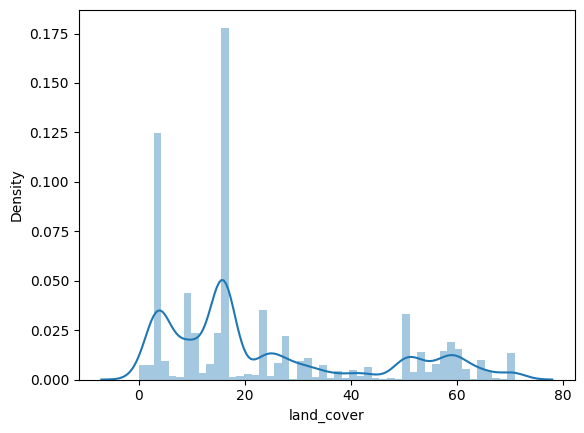

In [22]:
## KEEPOUTPUT
sns.distplot(train['land_cover']);

Descubra los tipos de datos

In [23]:
## KEEPOUTPUT
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

           sample_id float64
          land_cover float64
    land_cover_label object
                year float64
evi_mod13q1.stl.trend_p90_250m_jan01_feb28 float64
lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31 int16
lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28 int16
lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31 float64
lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30 float64
evi_mod13q1_p90_250m_nov01_dec31 float64
lst_mod11a2.nighttime.trend_p50_1km_may01_may31 float64
evi_mod13q1_p90_250m_sep01_oct31 float64
lst_mod11a2.nighttime.trend_p50_1km_jul01_jul31 float64
evi_mod13q1.stl.trend_p90_250m_jul01_aug31 float64
evi_mod13q1_p90_250m_mar01_apr30 float64
lst_mod11a2.nighttime.trend_p50_1km_jun01_jun30 float64
lst_mod11a2.nighttime.trend_p50_1km_aug01_aug31 float64
evi_mod13q1.stl.trend_p90_250m_mar01_apr30 float64
evi_mod13q1.stl.trend_p90_250m_may01_jun30 float64
lst_mod11a2.nighttime.trend_p50_1km_oct01_oct31 float64
lst_mod11a2.nighttime.trend_p50_1km_sep01_sep30 float64
ls

Inspeccionar columnas numéricas, Distrubución de los atributos numericos del dataset

In [24]:
## KEEPOUTPUT
train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
sample_id,42237.0,21101.857116,11595.440085,0.0,11666.0,21104.0,30531.0,42236.0
land_cover,42237.0,23.736487,19.756526,0.0,9.0,16.0,32.0,71.0
year,42237.0,2012.332410,4.108047,2006.0,2009.0,2012.0,2015.0,2018.0
evi_mod13q1.stl.trend_p90_250m_jan01_feb28,42237.0,3966.449535,931.231339,-3231.0,3451.0,3999.0,4548.0,7498.0
lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,42237.0,498.737363,126.097034,0.0,418.0,475.0,566.0,918.0
...,...,...,...,...,...,...,...,...
nir_mod13q1_sd_250m_2000_2022,42237.0,665.518077,220.432893,0.0,517.0,657.0,795.0,3224.0
pop.count_ghs.jrc_m_100m,42237.0,77.026209,504.638526,0.0,0.0,0.0,0.0,28525.0
cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,42237.0,384.105097,343.337832,0.0,117.0,272.0,571.0,2428.0
slope.percent_gedi.eml_m_30m_2000_2018,42237.0,20.882875,27.015066,0.0,6.0,11.0,23.0,224.0


Generar matriz de correlaciones

<ipython-input-26-a6083d13beab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


,sample_id,land_cover,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28,lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31,lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30,evi_mod13q1_p90_250m_nov01_dec31,lst_mod11a2.nighttime.trend_p50_1km_may01_may31,...,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,blue_mod13q1_p95_250m_2000_2022,red_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
sample_id,1.000000,0.000792,0.000053,0.002164,0.003932,0.003953,0.005554,0.003691,0.001457,0.004681,...,-0.000873,-0.000456,-0.002160,0.003082,-0.003425,-0.006620,-0.002247,0.006186,-0.004166,0.001202
land_cover,0.000792,1.000000,0.070835,-0.154552,0.067555,0.068836,0.064483,0.062979,-0.053848,0.059426,...,-0.145062,-0.191107,0.055318,0.083751,-0.133890,-0.144077,-0.041573,-0.003635,0.017729,0.038034
year,0.000053,0.070835,1.000000,0.050893,0.093267,0.086850,0.076166,0.065771,-0.013902,0.059130,...,0.018225,-0.001003,-0.034759,-0.088099,-0.085644,-0.013879,0.032384,0.054496,0.111673,0.109487
evi_mod13q1.stl.trend_p90_250m_jan01_feb28,0.002164,-0.154552,0.050893,1.000000,-0.215605,-0.215221,-0.203826,-0.205255,0.556236,-0.206102,...,0.718519,0.711015,-0.297823,-0.459190,0.165565,0.302692,-0.134226,-0.233076,-0.060800,-0.275437
lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,0.003932,0.067555,0.093267,-0.215605,1.000000,0.900616,0.898051,0.896079,0.169207,0.893110,...,-0.271899,-0.338312,0.090342,0.269136,-0.224967,-0.289918,0.068705,-0.187420,0.066626,-0.118398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nir_mod13q1_sd_250m_2000_2022,-0.006620,-0.144077,-0.013879,0.302692,-0.289918,-0.288329,-0.288754,-0.285421,-0.061560,-0.285666,...,0.217252,0.612962,-0.001331,-0.136817,0.543809,1.000000,-0.087197,-0.050076,0.012533,-0.091904
pop.count_ghs.jrc_m_100m,-0.002247,-0.041573,0.032384,-0.134226,0.068705,0.066146,0.063898,0.060807,-0.102938,0.059719,...,-0.109266,-0.154395,0.036603,0.063694,-0.109629,-0.087197,1.000000,-0.055251,-0.050758,-0.072129
cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,0.006186,-0.003635,0.054496,-0.233076,-0.187420,-0.189845,-0.193151,-0.192212,-0.178502,-0.191997,...,-0.132867,-0.170658,0.075554,0.046512,-0.049494,-0.050076,-0.055251,1.000000,0.278704,0.659275
slope.percent_gedi.eml_m_30m_2000_2018,-0.004166,0.017729,0.111673,-0.060800,0.066626,0.065951,0.056559,0.052920,-0.116210,0.051579,...,0.050582,-0.057925,-0.043734,-0.208186,-0.100412,0.012533,-0.050758,0.278704,1.000000,0.492319


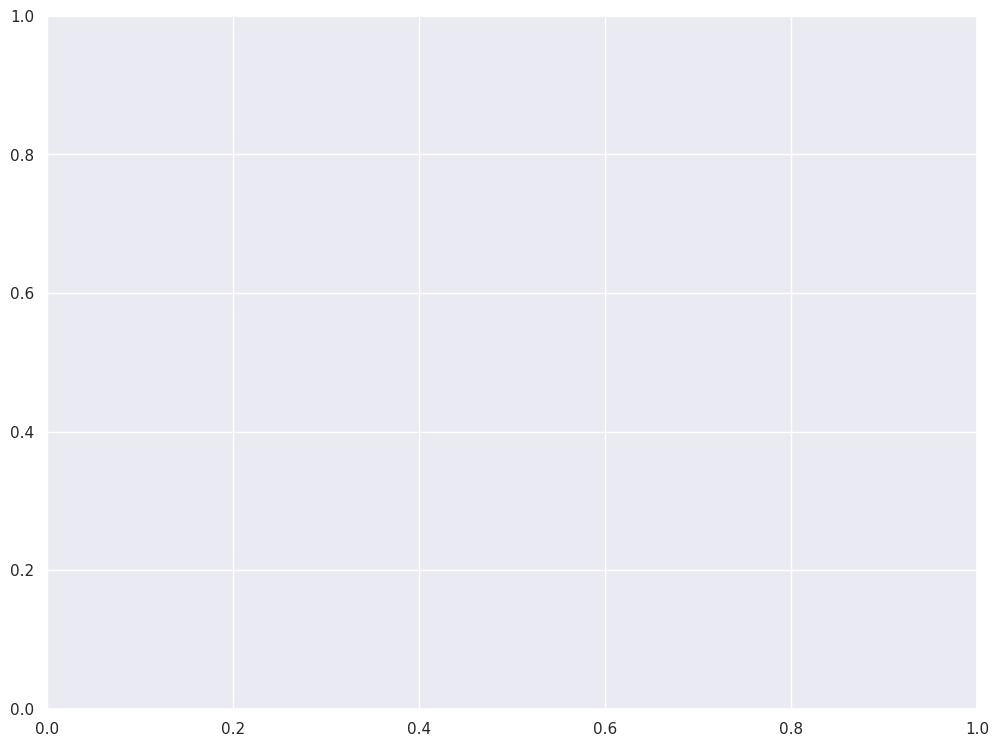

In [26]:
## KEEPOUTPUT
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
corrmat

calcular valor absoluto de las correlaciones de la matriz

In [27]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
corr_matrix = train.corr().abs()

# Set the threshold for high correlation
high_corr_threshold = 0.8

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > high_corr_threshold)]

print("Columns to drop:", to_drop)

<ipython-input-27-92fa983ece58>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().abs()


Columns to drop: ['lst_mod11a2.nighttime.trend_p50_1km_feb01_feb28', 'lst_mod11a2.nighttime.trend_p50_1km_mar01_mar31', 'lst_mod11a2.nighttime.trend_p50_1km_apr01_apr30', 'lst_mod11a2.nighttime.trend_p50_1km_may01_may31', 'lst_mod11a2.nighttime.trend_p50_1km_jul01_jul31', 'evi_mod13q1.stl.trend_p90_250m_jul01_aug31', 'lst_mod11a2.nighttime.trend_p50_1km_jun01_jun30', 'lst_mod11a2.nighttime.trend_p50_1km_aug01_aug31', 'evi_mod13q1.stl.trend_p90_250m_mar01_apr30', 'evi_mod13q1.stl.trend_p90_250m_may01_jun30', 'lst_mod11a2.nighttime.trend_p50_1km_oct01_oct31', 'lst_mod11a2.nighttime.trend_p50_1km_sep01_sep30', 'lst_mod11a2.nighttime.trend_p50_1km_nov01_nov30', 'lst_mod11a2.nighttime.trend_p50_1km_dec01_dec31', 'lst_mod11a2.nighttime_p05_1km_jan01_jan31', 'evi_mod13q1.stl.trend_p90_250m_nov01_dec31', 'lst_mod11a2.nighttime_p50_1km_jan01_jan31', 'lst_mod11a2.nighttime_p50_1km_feb01_feb28', 'lst_mod11a2.nighttime_p50_1km_mar01_mar31', 'lst_mod11a2.nighttime_p50_1km_aug01_aug31', 'lst_mod11a2

<ipython-input-27-92fa983ece58>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Cantidad de variables poco útiles

In [32]:
len(to_drop)

258

Se hace una copia del dataset original

In [33]:
train_copy= train.copy(deep=True)

Se eliminan las variables de menor relevancia

In [34]:
train_copy.drop(columns=to_drop)

,sample_id,land_cover,land_cover_label,year,evi_mod13q1.stl.trend_p90_250m_jan01_feb28,lst_mod11a2.nighttime.trend_p50_1km_jan01_jan31,evi_mod13q1_p90_250m_nov01_dec31,evi_mod13q1_p90_250m_sep01_oct31,evi_mod13q1_p90_250m_mar01_apr30,lst_mod11a2.nighttime_p05_1km_feb01_feb28,...,ndvi_mod13q1_p50_250m_2000_2022,ndvi_mod13q1_p05_250m_2000_2022,evi_mod13q1_p50_250m_2000_2022,evi_mod13q1_p95_250m_2000_2022,ndvi_mod13q1_sd_250m_2000_2022,nir_mod13q1_sd_250m_2000_2022,pop.count_ghs.jrc_m_100m,cost.distance.to.coast_gedi.grass.gis_30m_2000..2018,slope.percent_gedi.eml_m_30m_2000_2018,elev.lowestmode_gedi.eml_m_30m_2000_2018
0,0.0,16.0,Grassland without tree/shrub cover,2006.0,3630.0,377,2700.0,2736.0,5364.0,12715.0,...,5416.0,3762.0,3080.0,5420.0,1418.0,537.0,0.0,141.0,7,288.0
1,1.0,10.0,Coniferous woodland,2012.0,2851.0,319,2565.0,2679.0,2568.0,12924.0,...,7940.0,7164.0,2560.0,3292.0,478.0,348.0,0.0,272.0,55,683.0
2,2.0,15.0,Grassland with sparse tree/shrub cover,2018.0,3973.0,467,2650.0,2614.0,5209.0,13165.0,...,7940.0,5732.0,4180.0,6372.0,1110.0,891.0,0.0,272.0,13,336.0
3,3.0,16.0,Grassland without tree/shrub cover,2006.0,4401.0,302,3076.0,3434.0,6046.0,12899.0,...,7356.0,4568.0,5020.0,7024.0,1429.0,796.0,22.0,820.0,8,688.0
4,4.0,16.0,Shrubland with sparse tree cover,2012.0,4330.0,377,2875.0,4220.0,6354.0,12825.0,...,4808.0,2284.0,3180.0,6148.0,1964.0,850.0,74.0,191.0,19,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42232,42232.0,16.0,Grassland without tree/shrub cover,2009.0,3267.0,262,1632.0,2163.0,4659.0,12727.0,...,6056.0,3584.0,3792.0,5420.0,1373.0,604.0,6.0,165.0,10,288.0
42233,42233.0,71.0,Vineyards,2006.0,3868.0,547,3952.0,4170.0,4213.0,13540.0,...,5880.0,5032.0,3784.0,5420.0,848.0,388.0,0.0,26.0,3,95.0
42234,42234.0,16.0,Grassland without tree/shrub cover,2006.0,5642.0,341,3201.0,3264.0,6022.0,13081.0,...,7868.0,5692.0,3382.0,6400.0,945.0,437.0,0.0,6.0,0,43.0
42235,42235.0,4.0,Grassland without tree/shrub cover,2015.0,3642.0,761,4788.0,4545.0,4583.0,13711.0,...,4232.0,2770.0,2274.0,3800.0,1214.0,438.0,0.0,496.0,18,416.0


Generar matriz de relacion

---



<ipython-input-35-377f18c77fbf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_copy.corr()


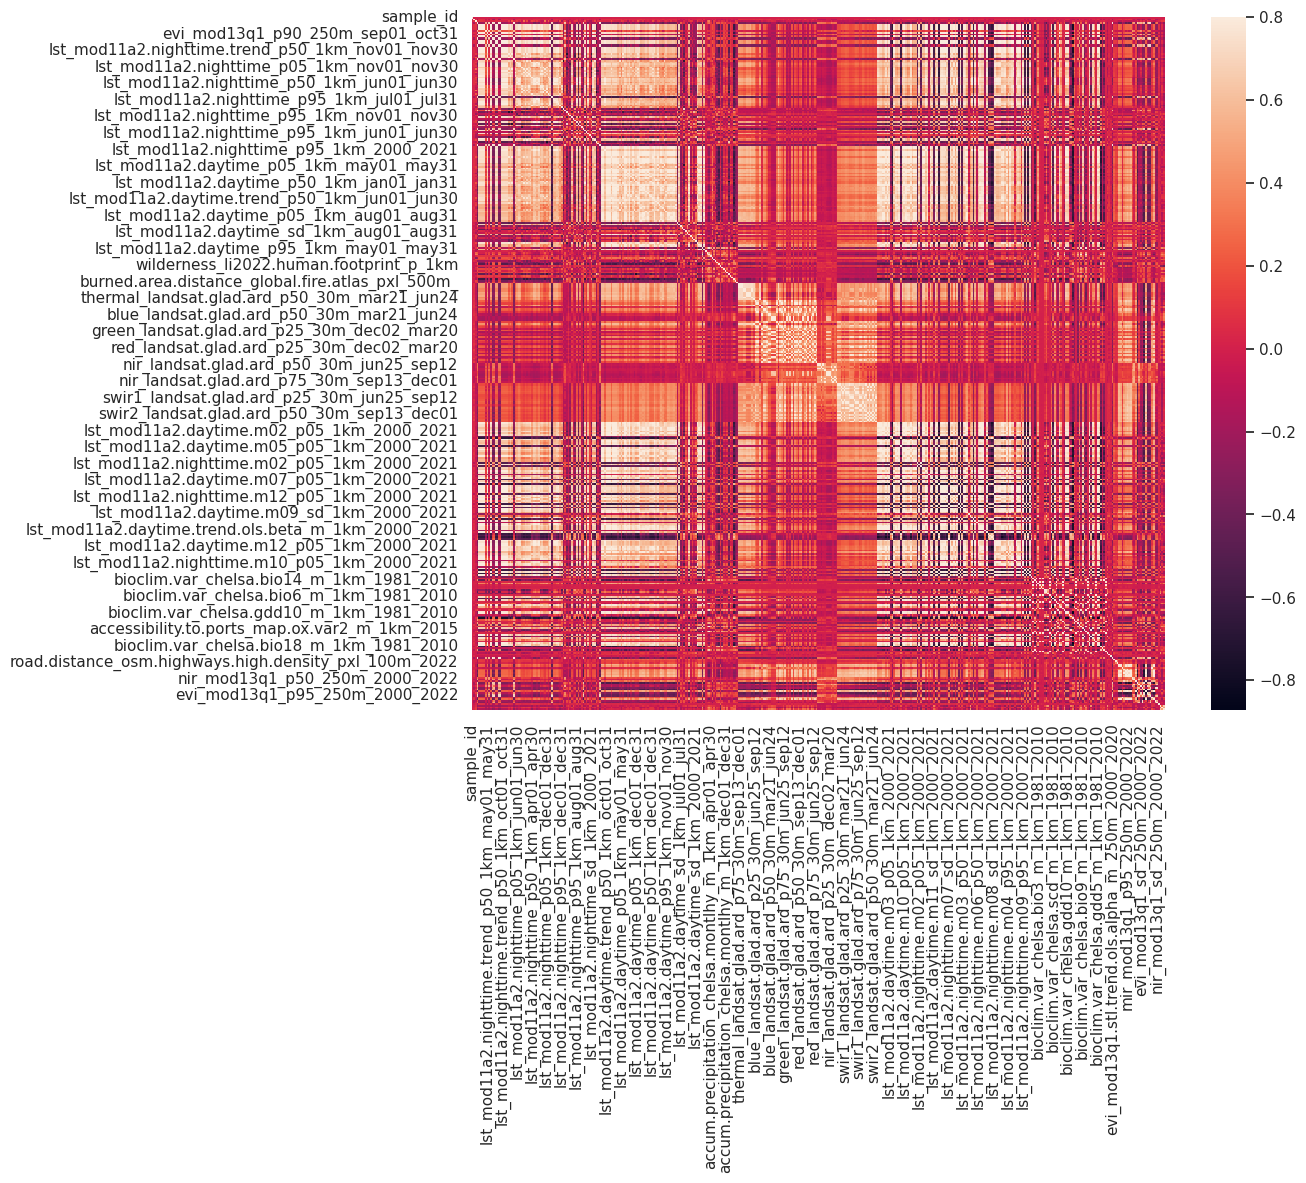

In [35]:
## KEEPOUTPUT
#correlation matrix
corrmat = train_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# corrmat

**Determinar variables con poca correlación**



In [36]:
corr_flat = corrmat.unstack()
corr_flat = corr_flat[corr_flat.index.get_level_values(0) != corr_flat.index.get_level_values(1)]
sort_by_pairs = corr_flat.sort_values()
sort_by_pairs[:10]

bioclim.var_chelsa.ngd0_m_1km_1981_2010      bioclim.var_chelsa.scd_m_1km_1981_2010        -0.872025
bioclim.var_chelsa.scd_m_1km_1981_2010       bioclim.var_chelsa.ngd0_m_1km_1981_2010       -0.872025
bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010  bioclim.var_chelsa.ngd10_m_1km_1981_2010      -0.871246
bioclim.var_chelsa.ngd10_m_1km_1981_2010     bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010   -0.871246
bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010  bioclim.var_chelsa.gdd5_m_1km_1981_2010       -0.864532
bioclim.var_chelsa.gdd5_m_1km_1981_2010      bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010   -0.864532
bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010  bioclim.var_chelsa.gdd0_m_1km_1981_2010       -0.849468
bioclim.var_chelsa.gdd0_m_1km_1981_2010      bioclim.var_chelsa.gdgfgd10_m_1km_1981_2010   -0.849468
lst_mod11a2.daytime.m12_p05_1km_2000_2021    lst_mod11a2.daytime.m12_sd_1km_2000_2021      -0.849427
lst_mod11a2.daytime.m12_sd_1km_2000_2021     lst_mod11a2.daytime.m12_p05_1km_2000_2021     

Separacion de la base de datos en variable de entrenamiento y prueba

In [40]:
from sklearn.model_selection import train_test_split

# Supongamos que 'X' son tus características y 'y' son tus etiquetas en tu DataFrame 'train'
# Asegúrate de tener 'X' e 'y' correctamente definidos según tus datos

# Por ejemplo, si tus columnas son 'feature1', 'feature2', ..., 'target'
X = train_copy.drop('land_cover_label', axis=1)  # 'X' son todas las columnas excepto la columna 'target'
y = train_copy['land_cover_label']  # 'y' es la columna 'target'

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
print (x_train[:10])
print (y_train[:10])

       sample_id  land_cover    year  \
2142      2142.0        41.0  2006.0   
40980    21104.0        59.0  2015.0   
9549      9549.0         9.0  2018.0   
15980    15980.0        27.0  2009.0   
19785    21104.0        43.0  2018.0   
3850      3850.0        32.0  2012.0   
2847     21104.0         4.0  2015.0   
1147     21104.0        66.0  2018.0   
36162    36162.0        59.0  2009.0   
29700    29700.0        10.0  2006.0   

       evi_mod13q1.stl.trend_p90_250m_jan01_feb28  \
2142                                       2696.0   
40980                                      3999.0   
9549                                       4519.0   
15980                                      4145.0   
19785                                      3809.0   
3850                                       1768.0   
2847                                       3999.0   
1147                                       5624.0   
36162                                      3775.0   
29700                        

Verificar tamaño de datos de entrenamiento y prueba

In [42]:
print(x_train.shape)
print(x_test.shape)


(33789, 419)
(8448, 419)


**Metricas**

In [49]:
#Función para reportar el error del modelo
def report_cv_score(z):

    #RMSE en prueba y entrenamiento
    lr_test_score = z['test_score']*(-1)
    lr_train_score = z['train_score']*(-1)
    lin_rmse_test = np.sqrt(lr_test_score)
    lin_rmse_train = np.sqrt(lr_train_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_test)), "(±", "{:.8f}".format(np.std(lin_rmse_test)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_train)), "(±", "{:.8f}".format(np.std(lin_rmse_train)),")")

In [50]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred):

    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Ahora puedes crear instancias de los estimadores
estimator1 = LinearRegression()
estimator2 = DecisionTreeRegressor(max_depth=5)
estimator3 = RandomForestRegressor(n_estimators=2, max_depth=5)


In [58]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


utiliza OneHotEncoder para convertir las etiquetas categóricas

In [60]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  "data.\n{}".format(


realiza la clasificación de un conjunto de datos utilizando un clasificador de regresión logística

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Definir el clasificador (puedes ajustar los parámetros según sea necesario)
classifier = LogisticRegression()

# Realizar la validación cruzada
z = cross_validate(classifier, x_train, y_train_encoded, return_train_score=True,
                   return_estimator=False, scoring="neg_mean_squared_error",
                   cv=ShuffleSplit(n_splits=10, test_size=val_size))

# Informar sobre el resultado
report_cv_score(z)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

RMSLE Test:  21.94898 (± 1.93637073 )
RMSLE Train:  21.82981 (± 2.05366092 )


realiza la comparación de varios clasificadores (regresión logística, bosques aleatorios y árboles de decisión)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Definir los clasificadores (puedes ajustar los parámetros según sea necesario)
classifiers = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier()]
best_model = None
best_score = 0  # Inicializamos con un valor bajo para la mejor precisión

for classifier in classifiers:
    print("---------")
    z = cross_validate(classifier, x_train, y_train_encoded, return_train_score=True,
                       return_estimator=False, scoring="accuracy",
                       cv=ShuffleSplit(n_splits=10, test_size=val_size))

    # Calcular la precisión
    accuracy = np.mean(z['test_score'])
    print("Accuracy: {:.5f}".format(accuracy))

    # Actualizar el mejor modelo si es necesario
    if accuracy > best_score:
        best_score = accuracy
        best_model = classifier

# Imprimir información sobre el mejor modelo
print("\nMejor modelo:")
print(best_model)


---------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Accuracy: 0.24967
---------
Accuracy: 0.52462
---------
Accuracy: 0.75867

Mejor modelo:
DecisionTreeClassifier()


Métodos de prediccion escogidos

DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Supongamos que X_train, X_test, y_train, y_test son tus conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

# Crea una instancia del DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

# Entrenar el modelo
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

Realizar predicciones en el conjunto de prueba

In [77]:
# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(x_test)


In [79]:
print(len(y_test), len(y_pred))


6758 8448


Ajustar los tamaños de los datos de prediccion y prueba

In [80]:
from sklearn.model_selection import train_test_split

# Suponiendo que X_train, y_train son tus conjuntos de entrenamiento originales
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear una instancia del DecisionTreeClassifier y entrenar el modelo
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_classifier.predict(X_test)

# Verificar y corregir las longitudes si son diferentes
if len(y_test) != len(y_pred):
    # Asegurarse de que ambos conjuntos tengan la misma longitud
    min_len = min(len(y_test), len(y_pred))
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]

# Ahora deberían tener la misma longitud
print(len(y_test), len(y_pred))

# Calcular la precisión y otras métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Otros informes de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


6758 6758
Accuracy: 0.7589523527670908
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.84      0.76      0.80        49
           2       0.81      0.84      0.82        69
           3       0.81      0.79      0.80       287
           4       0.81      0.84      0.82       952
           5       0.84      0.83      0.83       105
           6       0.75      0.75      0.75         4
           7       0.67      1.00      0.80         6
           8       0.67      0.60      0.63        10
           9       0.82      0.81      0.82       418
          10       0.78      0.87      0.82        99
          11       0.88      0.88      0.88       103
          12       0.78      0.89      0.83        35
          13       0.89      0.81      0.85        79
          14       1.00      1.00      1.00         2
          15       0.84      0.79      0.81       234
          16       0.57      0.59      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.


In [81]:
print(len(y_test), len(y_pred))


6758 6758


Se evalua la predicción

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Otros informes de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7589523527670908
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.84      0.76      0.80        49
           2       0.81      0.84      0.82        69
           3       0.81      0.79      0.80       287
           4       0.81      0.84      0.82       952
           5       0.84      0.83      0.83       105
           6       0.75      0.75      0.75         4
           7       0.67      1.00      0.80         6
           8       0.67      0.60      0.63        10
           9       0.82      0.81      0.82       418
          10       0.78      0.87      0.82        99
          11       0.88      0.88      0.88       103
          12       0.78      0.89      0.83        35
          13       0.89      0.81      0.85        79
          14       1.00      1.00      1.00         2
          15       0.84      0.79      0.81       234
          16       0.57      0.59      0.58      168

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.


RandomForestClassifier


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Supongamos que X_train, X_test, y_train, y_test son tus conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

# Crea una instancia del RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar los parámetros según sea necesario

# Entrenar el modelo
forest_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Realizar predicciones en el conjunto de prueba

In [84]:
# Realizar predicciones en el conjunto de prueba
y_pred = forest_classifier.predict(x_test)



Ajustar el tamaño de los datos de predicción y prueba

In [86]:
from sklearn.model_selection import train_test_split

# Suponiendo que X_train, y_train son tus conjuntos de entrenamiento originales
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear una instancia del DecisionTreeClassifier y entrenar el modelo
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_classifier.predict(X_test)

# Verificar y corregir las longitudes si son diferentes
if len(y_test) != len(y_pred):
    # Asegurarse de que ambos conjuntos tengan la misma longitud
    min_len = min(len(y_test), len(y_pred))
    y_test = y_test[:min_len]
    y_pred = y_pred[:min_len]

# Ahora deberían tener la misma longitud
print(len(y_test), len(y_pred))

# Calcular la precisión y otras métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Otros informes de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


6758 6758
Accuracy: 0.7579165433560225
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.80      0.73      0.77        49
           2       0.82      0.81      0.82        69
           3       0.82      0.80      0.81       287
           4       0.82      0.84      0.83       952
           5       0.83      0.86      0.85       105
           6       0.60      0.75      0.67         4
           7       0.75      1.00      0.86         6
           8       0.70      0.70      0.70        10
           9       0.82      0.81      0.82       418
          10       0.79      0.84      0.81        99
          11       0.91      0.89      0.90       103
          12       0.89      0.91      0.90        35
          13       0.87      0.78      0.83        79
          14       1.00      0.50      0.67         2
          15       0.84      0.77      0.80       234
          16       0.57      0.59      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: 

Se evalua la Predicción

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Otros informes de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.7579165433560225
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.80      0.73      0.77        49
           2       0.82      0.81      0.82        69
           3       0.82      0.80      0.81       287
           4       0.82      0.84      0.83       952
           5       0.83      0.86      0.85       105
           6       0.60      0.75      0.67         4
           7       0.75      1.00      0.86         6
           8       0.70      0.70      0.70        10
           9       0.82      0.81      0.82       418
          10       0.79      0.84      0.81        99
          11       0.91      0.89      0.90       103
          12       0.89      0.91      0.90        35
          13       0.87      0.78      0.83        79
          14       1.00      0.50      0.67         2
          15       0.84      0.77      0.80       234
          16       0.57      0.59      0.58      168

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: 